#### Adaptive Computation and Machine Learning series
# Deep Learning 
http://www.deeplearningbook.org/

## Ch4 Numerical Computation

2016.11.19

### 4.1 Overflow and Underflow

**Overflow** occurswhen numbers with large magnitude.  
**Underﬂow** occurs when numbers near zero are rounded to zero.

There are many ways to represent a number by bits. Floating point defined by IEEE 754 is one popular way. For **Single Precision Floating Point** number, the minimum and maximum numbers are:  
±1.18×10<sup>-38</sup>  
±3.4×10<sup>38</sup>  

| Name  | Sign Bit | Exponent | Mantissa | Total |
|---|:---:|:---:|:---:|---:|
| Single Precision | 1  | 8  | 23  | 32 |
| Souble Precision | 1  | 11 | 52  | 64 |

And, notice that **the error is not uniform**

In [92]:
rep = 7
tmp = 2.0
for i in range(1,rep,1):
    tmp = tmp / 10.0

print('The value is {}'.format(tmp))
    
for i in range(1,rep,1):
    tmp = tmp * 10.0

print('The value is {}'.format(tmp))

The value is 2.0000000000000003e-06
The value is 2.0000000000000004


In [87]:
rep = 64
tmp = 10.0

for i in range(1,rep,1):
    tmp = tmp * 10.0

print('The value is {}'.format(tmp))
    
for i in range(1,rep,1):
    tmp = tmp / 10.0

print('The value is {}'.format(tmp))


The value is 1.0000000000000002e+64
The value is 10.000000000000007


In [95]:
# Use Math Library
import math
rep = 32.0
orig = 3.0
tmp = orig

tmp = tmp / math.pow(orig,rep)
print('The value is {}'.format(tmp))

tmp = tmp * math.pow(orig,rep)
print('The value is {}'.format(tmp))

The value is 1.618978583206287e-15
The value is 3.0


In [133]:
# Use Math Library
import math
rep = 32.0
orig = 10.0
tmp = orig

tmp = tmp * math.pow(orig,rep)
print('The value is {}'.format(tmp))
    
tmp = tmp / math.pow(orig,rep)
print('The value is {}'.format(tmp))


The value is 1.0000000000000001e+33
The value is 10.0


### 4.2 Poor Conditioning

Consider the functionf(x) = A<sup>−1</sup>x. When A∈R<sup>n×n</sup> has an eigen value decomposition, its condition number is

$$ \max_{i,j}|\dfrac{\lambda_i}{\lambda_j}|
$$

This sensitivity is an intrinsic property of the matrix itself, not the result of rounding error during matrix inversion. Poorly conditioned matrices amplify pre-existing errors when we multiply by the true matrix inverse. In practice, the error will be compounded further by numerical errors in the inversion process itself.


### 4.3 Gradient-Based Optimization

Most deep learning algorithms involve optimization of some sort. The function we want to minimize or maximize is called the **objective function** or **criterion**. For minimization case, we also call objective function as **cost function,loss function, or error function**.

** "\*" == optimization **  
We often denote the value that minimizes or maximizes a function with a superscript ∗. For example, we might say x<sup>∗</sup> = arg min f(x)

**Gradient descent**  
A local minimum is a point where f(x) is lower than at all neighboring points. Points where f'(x) = 0 are known as critical points or stationary points or a "possible local minimum".

$$ f(x+\delta) = f(x) + \delta \cdot f'(x)
$$

For functions with multiple inputs, we must make use of the concept of partial derivatives.  The gradient generalizes the notion of derivative to the case where the derivative is with respect to a vector: the gradient off is the vector containing all of the partial derivatives, denoted ∇<sub>x</sub>f(x).

In multiple dimension, critical points are points where every element of the gradient is equal to zero. This is known as the method of steepest descent or gradient descent:

$$ x_{next} = x_{current} − \epsilon \nabla_{x}f(x_{current})
$$

where 𝜖 is the learning rate, a positive scalar determining the size of the step. In some cases, we may be able to avoid running this iterative algorithm, and just jump directly to the critical point by solving theequation ∇<sub>x</sub>f(x) = 0 for x.

**Jacobian matrix**  
If we have a function f: R<sup>m</sup>→ R<sup>n</sup>,then the Jacobian matrix J ∈ R<sup>nxm</sup> of f is deﬁned such that:

$$ J_{i,j} = \dfrac{\partial}{\partial x_j}f_i(x)
$$

**Hessian matrix**  
When our function has multiple input dimensions, there are many second derivatives. These derivatives can be collected together into a matrix called the Hessian matrix. The Hessian matrix H(f)(x) is deﬁned such that

$$ H(f)(x) = J(\nabla f)(x)
$$

$$ H_{i,j}=\dfrac{∂^2 f}{∂x_i ∂x_j}
$$

The second derivative can be used to determine whether a critical point isa local maximum, a local minimum, or saddle point. When f'(x) = 0 and f''(x)>0, we can conclude that x is a local minimum.

**Lipschitz continuous** 是一個比通常連續更強的光滑性條件。限制了函數改變的速度，符合利普希茨條件的函數的斜率，必小於一個稱為利普希茨常數（Lipschitz constant）的實數。

**Convex optimization** algorithms are applicable only to convex functions — functions for which the Hessian is positive semideﬁnite everywhere. (No saddle point, all local minimums are global minimum...). Convex optimization is used only as a sub-routine of some deep learning algorithms.

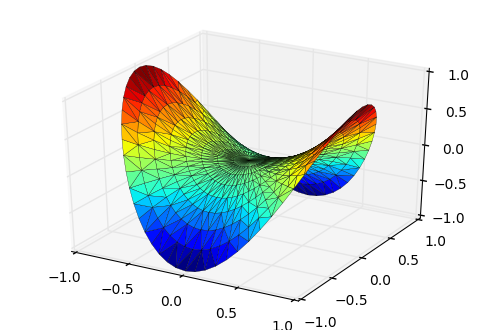

In [153]:
# From http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 72 #36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
# z = np.sin(-x*y)
# Self defined surface
z = (x*x - y*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()


### 4.4 Constrained Optimization

Although we want to optimize f(x), but sometimes x is constrained. We only have feasible points to optimize f(x).

**Generalized Lagrange function** and the Karush–Kuhn–Tucker(KKT) approach

There is a surface f(x,y) and a line g(x,y) = c. Largrange function is to find (x,y) that maximize f(x,y) and also satisfied g(x,y) = c

Lagrange function is defined as:
$$ L(x,y,\lambda) = f(x,y) - \lambda \cdot g(x,y)
$$
$$ Solve \nabla_{x,y,\lambda} L(x,y,\lambda) = 0
$$

[more](https://zh.wikipedia.org/wiki/%E6%8B%89%E6%A0%BC%E6%9C%97%E6%97%A5%E4%B9%98%E6%95%B0)


### 4.5 Example: Linear Least Squares

Suppose we want to ﬁnd the value of x that minimize f(x) by gredient based algorithm.
$$ f(x) = \dfrac{1}{2}||Ax − b||_{2}^{2}
$$

First, we need to obtain the gredient:
$$ \nabla_{x}f(x) = A^T(Ax − b) = A^TAx − A^Tb.
$$

Then, we need a learning rate and tolerance (δ), if ||𝛻f(x)||<sub>2</sub> > δ, keep doing:
$$ x_{next} = x_{current} − \epsilon \nabla_{x}f(x_{current})
$$


In [ ]:
# Write a Gredient based algorithm here:


Now suppose we wish to minimize the same function, but subject to the constraint x<sup>T</sup> x ≤ 1. To do so, we introduce the Lagrangian

$$ L(x, \lambda) = f(x) + \lambda(x^Tx − 1)
$$

We can now solve the function by
$$ \min_x \max_{λ,λ≥0} L(x,\lambda)
$$

By differentiate L,
$$ A^TAx − A^Tb + 2\lambda x = 0  \\
\\
x = (A^TA + 2 \lambda I)^{−1}A^Tb \\
\\
\dfrac{∂L(x, \lambda)}{∂ \lambda} = (x^Tx − 1)
$$

The process of solving the linear equation and adjusting λ continues until x has the correct norm and the derivative on λ is 0.


In [ ]:
#Implement Lagrange function algorithm

